In [2]:
# importamos las librerias a utilizar

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from pandas import json_normalize
import json
import seaborn as sns

In [3]:
#Se crea la conexión a la DB

conn = sqlite3.connect('C:/Users/migue/Documents/Henry/Proyecto Final/travel.sqlite')
cursor = conn.cursor()


In [4]:
cursor.execute("select name from sqlite_master where type='table';")
tablas = cursor.fetchall()

In [5]:
vuelos = pd.read_sql("select * from flights;", conn)
vuelos

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [6]:
# validamos el tamaño de la tabla

vuelos.shape

(33121, 10)

In [7]:
vuelos.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'aircraft_code',
       'actual_departure', 'actual_arrival'],
      dtype='object')

In [8]:
# análisis descriptivo inicial de las columnas 

for columna in vuelos.columns:
    print(columna)
    print(vuelos[columna].describe())
    print ('______________________' )

flight_id
count    33121.000000
mean     16561.000000
std       9561.353469
min          1.000000
25%       8281.000000
50%      16561.000000
75%      24841.000000
max      33121.000000
Name: flight_id, dtype: float64
______________________
flight_no
count      33121
unique       710
top       PG0063
freq          61
Name: flight_no, dtype: object
______________________
scheduled_departure
count                      33121
unique                     10365
top       2017-08-08 11:25:00+03
freq                          11
Name: scheduled_departure, dtype: object
______________________
scheduled_arrival
count                      33121
unique                      9648
top       2017-09-10 14:55:00+03
freq                          13
Name: scheduled_arrival, dtype: object
______________________
departure_airport
count     33121
unique      104
top         DME
freq       3217
Name: departure_airport, dtype: object
______________________
arrival_airport
count     33121
unique      104
top    

In [9]:
# validamos la cantidad de registros unicos de la columna flight_id

vuelos['flight_id'].nunique()

33121

In [10]:
# validamos la cantidad de nulos por columna    
vuelos.isnull().sum()

flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

In [11]:
# convertimos las columnas a formato hora 
vuelos['scheduled_departure'] = pd.to_datetime(vuelos['scheduled_departure'], errors='coerce')


In [12]:
vuelos['scheduled_arrival'] = pd.to_datetime(vuelos['scheduled_arrival'], errors='coerce')

In [13]:
vuelos['actual_departure'] = pd.to_datetime(vuelos['actual_departure'], errors='coerce')
vuelos['actual_arrival'] = pd.to_datetime(vuelos['actual_arrival'], errors='coerce')

C:\Users\migue\AppData\Local\Temp\ipykernel_16628\1700623746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vuelos['actual_departure'] = pd.to_datetime(vuelos['actual_departure'], errors='coerce')
C:\Users\migue\AppData\Local\Temp\ipykernel_16628\1700623746.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vuelos['actual_arrival'] = pd.to_datetime(vuelos['actual_arrival'], errors='coerce')


In [14]:
# calculo del tiempo estimado de vuelo

vuelos['tiempo_estimado_vuelo'] = vuelos['scheduled_arrival'] - vuelos['scheduled_departure']


In [15]:
# calculo del tiempo real de vuelo
vuelos['tiempo_real_vuelo'] = vuelos['actual_arrival'] - vuelos['actual_departure']


In [16]:
# calculo de la diferencia entre el tiempo de vuelo estimado y el tiempo de vuelo real
vuelos['diferencia_tiempo_vuelo'] = vuelos['tiempo_real_vuelo'] - vuelos['tiempo_estimado_vuelo']

In [17]:
vuelos['tiempo_retraso_salida'] = vuelos['actual_departure'] - vuelos['scheduled_departure']
vuelos



,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,tiempo_estimado_vuelo,tiempo_real_vuelo,diferencia_tiempo_vuelo,tiempo_retraso_salida
0,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,319,NaT,NaT,0 days 05:05:00,NaT,NaT,NaT
1,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,CR2,NaT,NaT,0 days 02:45:00,NaT,NaT,NaT
2,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,763,NaT,NaT,0 days 01:45:00,NaT,NaT,NaT
3,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,763,NaT,NaT,0 days 01:30:00,NaT,NaT,NaT
4,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,SU9,NaT,NaT,0 days 00:55:00,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,0 days 00:45:00,0 days 00:45:00,0 days 00:00:00,0 days 00:00:00
33117,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,0 days 00:45:00,0 days 00:45:00,0 days 00:00:00,0 days 00:05:00
33118,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,CR2,NaT,NaT,0 days 00:45:00,NaT,NaT,NaT
33119,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,0 days 00:45:00,0 days 00:46:00,0 days 00:01:00,0 days 00:01:00


In [16]:
vuelos.describe()

,flight_id,tiempo_estimado_vuelo
count,33121.000000,33121
mean,16561.000000,0 days 02:08:24.450348721
std,9561.353469,0 days 01:29:44.461630813
min,1.000000,0 days 00:25:00
25%,8281.000000,0 days 01:05:00
50%,16561.000000,0 days 01:55:00
75%,24841.000000,0 days 02:45:00
max,33121.000000,0 days 08:50:00


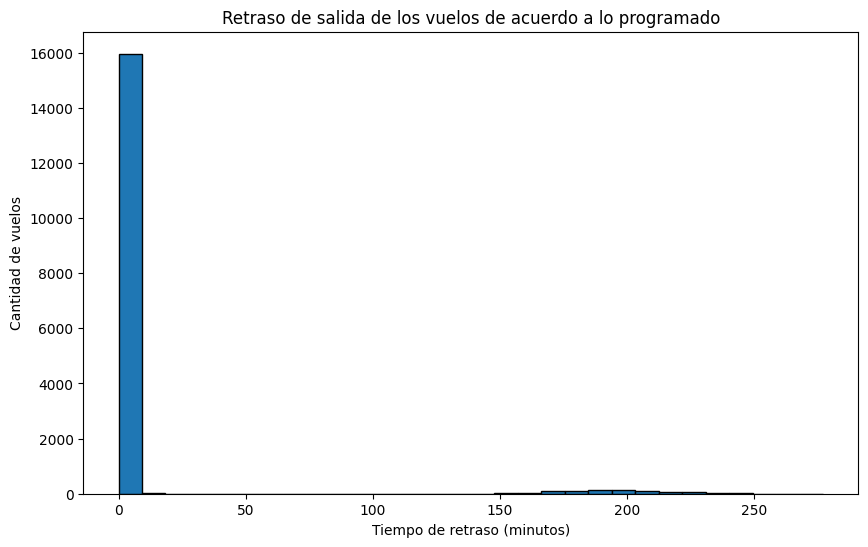

In [18]:

vuelos['tiempo_retraso_salida'] = (vuelos['actual_departure'] - vuelos['scheduled_departure']).dt.total_seconds() / 60

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.hist(vuelos['tiempo_retraso_salida'], bins=30, edgecolor='black')
plt.title('Retraso de salida de los vuelos de acuerdo a lo programado')
plt.xlabel('Tiempo de retraso (minutos)')
plt.ylabel('Cantidad de vuelos')
plt.show()

# En esta gráfica podemos observar que hay gran cantidad de retrasos en la salida de los vuelos, sin embargo, la mayoría de retrasos son de 5 a 10 minutos. Tamrecortbién existen retraos de más de dos horas pero es una proporción muy ninima en relación al total de vuelos que tiene la aerolinea.

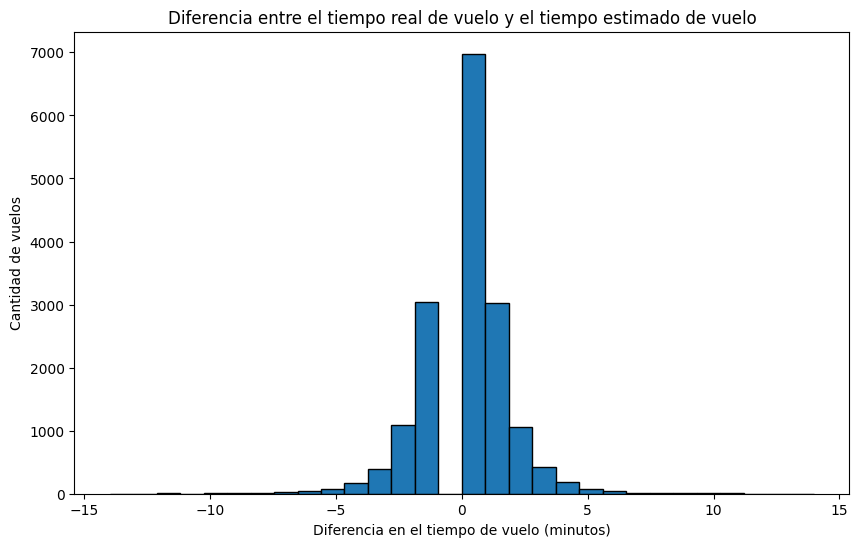

In [76]:
vuelos['diferencia_tiempo_vuelo'] = (vuelos['tiempo_real_vuelo'] - vuelos['tiempo_estimado_vuelo']).dt.total_seconds() / 60

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.hist(vuelos['diferencia_tiempo_vuelo'], bins=30, edgecolor='black')
plt.title('Diferencia entre el tiempo real de vuelo y el tiempo estimado de vuelo')
plt.xlabel('Diferencia en el tiempo de vuelo (minutos)')
plt.ylabel('Cantidad de vuelos')
plt.show()


# valores positivos representan que el vuelo duró mas de lo estimado y los valores negativos representan que el vuelo duró menos de lo estimado por la aerolinea.
# La diferencia del tiempo de vuelo real y el estimado oscila entre +/- 5 minutos. esto puede ser por condiciones meteorológicas, tráfico aereo, problemas tecnicos y controles de tráfico aereo


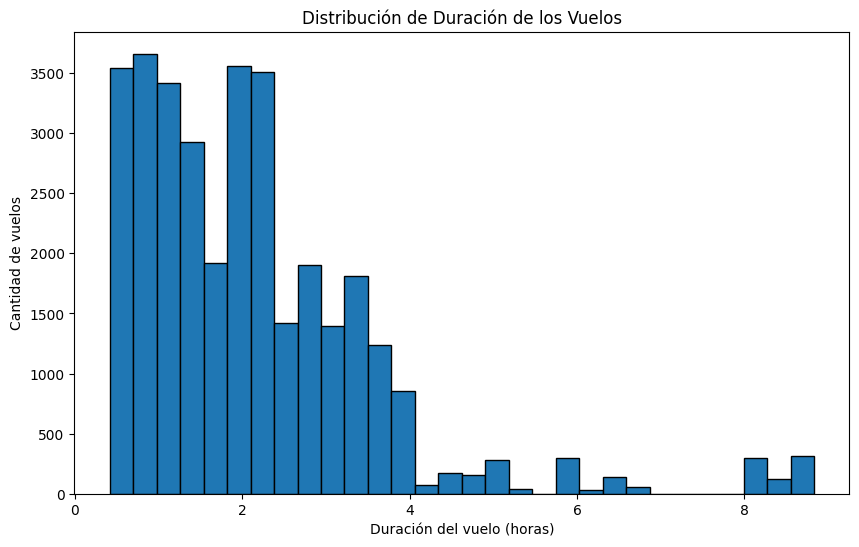

In [17]:
vuelos['tiempo_estimado_vuelo'] = vuelos['tiempo_estimado_vuelo'].dt.total_seconds() / 3600

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.hist(vuelos['tiempo_estimado_vuelo'], bins=30, edgecolor='black')
plt.title('Distribución de Duración de los Vuelos')
plt.xlabel('Duración del vuelo (horas)')
plt.ylabel('Cantidad de vuelos')
plt.show()

# podemos observar que la duración de la mayoría de vuelos de la aerolinea no superan las 4 horas, habiendo mayor concentración en los vuelos de no más de dos horas de duración.
# sin embargo la aeroliea tambien tiene vuelos con duración de 6 y 8 horas. 


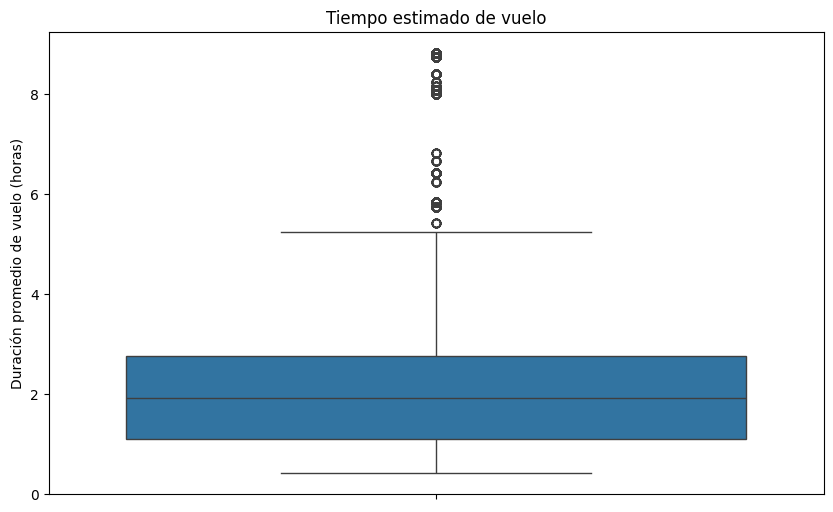

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(vuelos['tiempo_estimado_vuelo'])
plt.title('Tiempo estimado de vuelo')
plt.ylabel('Duración promedio de vuelo (horas)')
plt.show()

# En esta gráfica podemos observar que la duración promedio de los vuelos de la aerolinea es de dos horas.

ANALISIS DE VUELOS, AERONAVES, CANTIDAD DE ASIENTOS Y TIQUETES VENDIDOS

In [25]:
# Tabla aeronaves sin los nombres en ruso

aeronaves = pd.read_sql("select * from aircrafts_data;", conn)
aeronaves["model"] = aeronaves["model"].apply(json.loads)
aeronaves[["modelo_ingles", "modelo_ruso"]] = aeronaves["model"].apply(lambda x: pd.Series([x["en"], x["ru"]]))
aeronaves = aeronaves.drop("model", axis=1)
aeronaves = aeronaves.drop("modelo_ruso", axis=1)
aeronaves

,aircraft_code,range,modelo_ingles
0,773,11100,Boeing 777-300
1,763,7900,Boeing 767-300
2,SU9,3000,Sukhoi Superjet-100
3,320,5700,Airbus A320-200
4,321,5600,Airbus A321-200
5,319,6700,Airbus A319-100
6,733,4200,Boeing 737-300
7,CN1,1200,Cessna 208 Caravan
8,CR2,2700,Bombardier CRJ-200


In [26]:
# creamos una nueva tabla relacionando la informacion de aeronaves y vuelos

columnas =['aircraft_code','flight_id','flight_no','scheduled_departure','scheduled_arrival','departure_airport','arrival_airport','status','modelo_ingles','actual_departure','actual_arrival']
vuelos_aeronaves = pd.merge (vuelos,aeronaves, on='aircraft_code', how='inner')[columnas]
vuelos_aeronaves

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00


In [27]:
# Calculo de cantidad de asientos por aeronave

asientos =  pd.read_sql("select * from seats;", conn)
asientos_vuelo = asientos.groupby('aircraft_code')['seat_no'].count()
asientos_vuelo = asientos_vuelo.reset_index(name='seat_count')
asientos_vuelo

,aircraft_code,seat_count
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [28]:
asientos_modelo_aeronave = pd.merge( aeronaves, asientos_vuelo, on='aircraft_code', how='left')
asientos_modelo_aeronave

,aircraft_code,range,modelo_ingles,seat_count
0,773,11100,Boeing 777-300,402
1,763,7900,Boeing 767-300,222
2,SU9,3000,Sukhoi Superjet-100,97
3,320,5700,Airbus A320-200,140
4,321,5600,Airbus A321-200,170
5,319,6700,Airbus A319-100,116
6,733,4200,Boeing 737-300,130
7,CN1,1200,Cessna 208 Caravan,12
8,CR2,2700,Bombardier CRJ-200,50


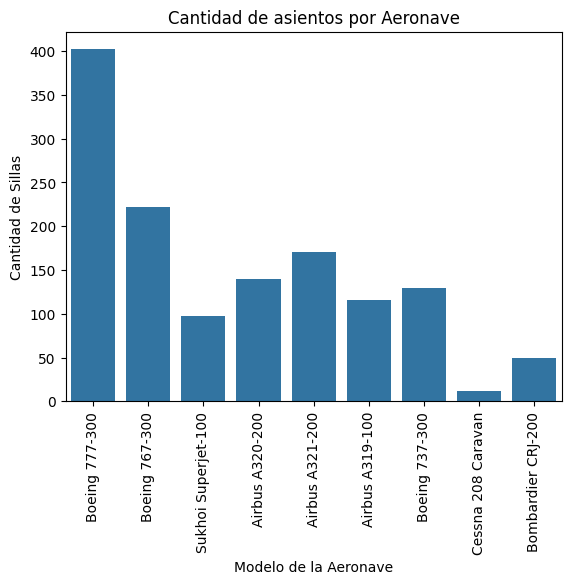

In [29]:
sns.barplot(data = asientos_modelo_aeronave, x='modelo_ingles', y='seat_count')
plt.title('Cantidad de asientos por Aeronave')
plt.xlabel('Modelo de la Aeronave')
plt.ylabel('Cantidad de Sillas')
plt.xticks(rotation=90)
plt.show()

# Observamos que el Aeronave que mas tiene capacidad es el Boeing 777-300 con un total de 400 sillas. 

In [30]:
tipo_asiento= pd.merge(asientos_modelo_aeronave, asientos, on='aircraft_code', how='left')
tipo_asiento

,aircraft_code,range,modelo_ingles,seat_count,seat_no,fare_conditions
0,773,11100,Boeing 777-300,402,1A,Business
1,773,11100,Boeing 777-300,402,1C,Business
2,773,11100,Boeing 777-300,402,1D,Business
3,773,11100,Boeing 777-300,402,1G,Business
4,773,11100,Boeing 777-300,402,1H,Business
...,...,...,...,...,...,...
1334,CR2,2700,Bombardier CRJ-200,50,22B,Economy
1335,CR2,2700,Bombardier CRJ-200,50,22C,Economy
1336,CR2,2700,Bombardier CRJ-200,50,22D,Economy
1337,CR2,2700,Bombardier CRJ-200,50,23A,Economy


In [31]:
# unificamos en una sola tabla la información de vuelos, aeronaves y asientos por aeronave
cantidad_asientos_vuelo = pd.merge( vuelos_aeronaves, asientos_vuelo, on='aircraft_code', how='left')
cantidad_asientos_vuelo

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival,seat_count
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT,116
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT,50
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT,222
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT,222
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT,97
...,...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,50
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,50
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT,50
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,50


In [32]:
# realizamos el conteo de tiquetes de vuelo 

tiquetes_vuelo =  pd.read_sql("select * from ticket_flights;", conn)
conteo_pasajeros = tiquetes_vuelo.groupby('flight_id')['ticket_no'].count()
conteo_pasajeros = conteo_pasajeros.reset_index(name='ticket_count')
conteo_pasajeros

,flight_id,ticket_count
0,1,79
1,2,101
2,3,97
3,5,93
4,6,101
...,...,...
22221,33117,16
22222,33118,16
22223,33119,4
22224,33120,13


In [33]:
tiquetes =  pd.read_sql("select * from tickets;", conn)
tiquetes

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [34]:
# Calculamos el total de ingresos, el ingreso promedio y los tiquetes vendidos por avión
# unimos las tablas de vuelos y tiquetes de vuelo 
union = pd.merge(vuelos, tiquetes_vuelo, on='flight_id')
# unimos con la tabla tiquetes para obtener los precios
union = pd.merge(union, tiquetes, on='ticket_no')
ingresos_por_avion = union.groupby('aircraft_code').agg(
    total_ingresos=('amount', 'sum'),        # Total de ingresos
    promedio_ingreso=('amount', 'mean'),     # Ingreso promedio por ticket
    tickets_vendidos=('ticket_no', 'count')  # Cantidad de tickets vendidos
).reset_index()
print(ingresos_por_avion)


  aircraft_code  total_ingresos  promedio_ingreso  tickets_vendidos
0           319      2706163100      51201.693376             52853
1           321      1638164100      15291.509302            107129
2           733      1426552100      16568.164503             86102
3           763      4371277100      35033.557472            124774
4           773      3431205500      23765.760930            144376
5           CN1        96373800       6568.552345             14672
6           CR2      1982760500      13207.661102            150122
7           SU9      5114484700      13985.541895            365698


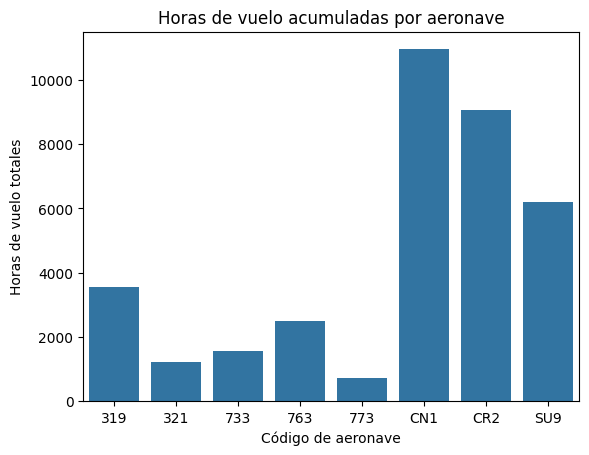

In [69]:
sns.barplot(x='aircraft_code', y='total_horas_vuelo', data=horas_vuelo_acumuladas)
plt.xlabel('Código de aeronave')
plt.ylabel('Horas de vuelo totales')
plt.title('Horas de vuelo acumuladas por aeronave')
plt.show()

# En esta gráfica podemos observar la cantidad de horas de vuelo acumuladas por aeronave
# Podemos observar que la Aeronave CN1 - Cessna 208 Caravan es la que acumula más horas de vuelos


In [37]:
# Cantidad de vuelos por aeronave 
# Agrupar por aeronave y contar los vuelos
vuelos_por_aeronave = vuelos.groupby('aircraft_code')['flight_no'].count().reset_index()

# Renombrar la columna para mayor claridad
vuelos_por_aeronave.columns = ['aircraft_code', 'cantidad_vuelos']

print(vuelos_por_aeronave)

  aircraft_code  cantidad_vuelos
0           319             1239
1           321             1952
2           733             1274
3           763             1221
4           773              610
5           CN1             9273
6           CR2             9048
7           SU9             8504


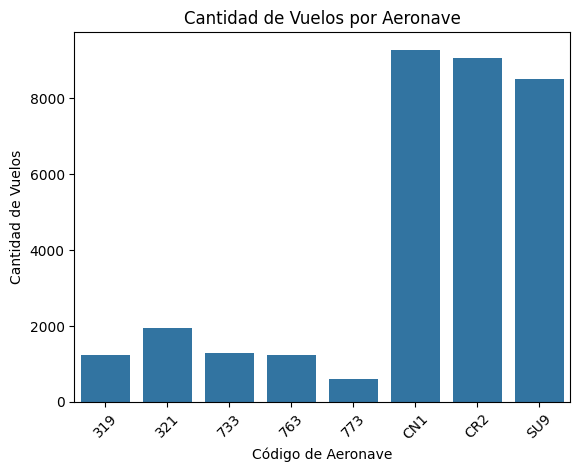

In [20]:
sns.barplot(x='aircraft_code', y='cantidad_vuelos', data=vuelos_por_aeronave)

# Personalizar el gráfico
plt.xlabel('Código de Aeronave')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de Vuelos por Aeronave')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muchas
plt.show()

In [38]:
# Duración promedio del vuelo por aeronave 

vuelos['scheduled_departure'] = pd.to_datetime(vuelos['scheduled_departure'])
vuelos['scheduled_arrival'] = pd.to_datetime(vuelos['scheduled_arrival'])

# Calcular la duración del vuelo en horas
vuelos['flight_duration'] = (vuelos['scheduled_arrival'] - vuelos['scheduled_departure']).dt.total_seconds() / 3600

# Calcular la duración promedio de todos los vuelos
promedio_vuelo = vuelos['flight_duration'].mean()
print("La duración promedio de un vuelo es:", promedio_vuelo, "horas")

# Calcular la duración promedio por aeronave
duracion_promedio_por_aeronave = vuelos.groupby('aircraft_code')['flight_duration'].mean()
duracion_promedio_por_aeronave

La duración promedio de un vuelo es: 2.140125096867043 horas


aircraft_code
319    5.698614
321    1.223958
733    2.386970
763    4.101215
773    2.350000
CN1    2.340783
CR2    1.982049
SU9    1.447740
Name: flight_duration, dtype: float64

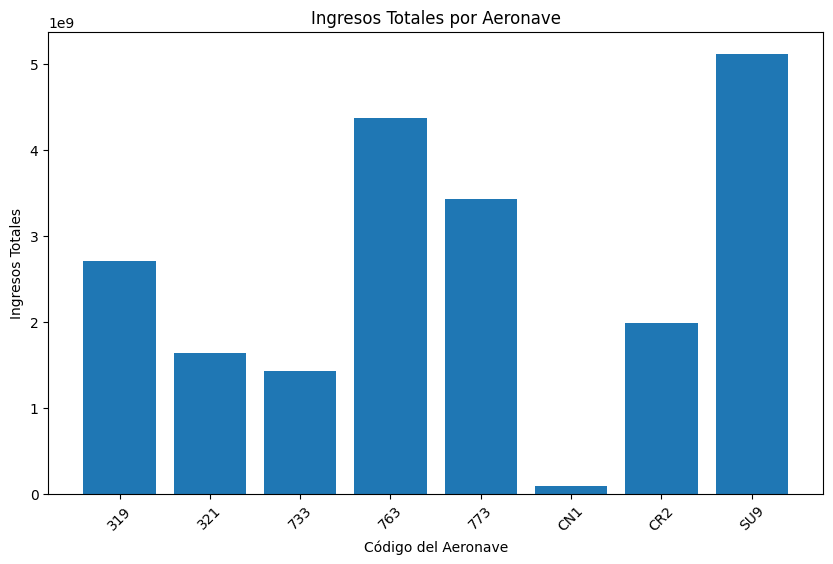

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(ingresos_por_avion['aircraft_code'], ingresos_por_avion['total_ingresos'])
plt.title('Ingresos Totales por Aeronave')
plt.xlabel('Código del Aeronave')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()

# Observamos que la aeronave que más ingresos genera es la SU9 - Sukhoi Superjet-100	

In [42]:
# Tarifas por aeronave de acuerdo al tipo de asiento

tarifas_aeronave = pd.read_sql_query("""select fare_conditions, aircraft_code, avg(amount) as average_amount from flights 
                    inner join ticket_flights using (flight_id)
                    group by aircraft_code, fare_conditions""", conn)
tarifas_aeronave

,fare_conditions,aircraft_code,average_amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


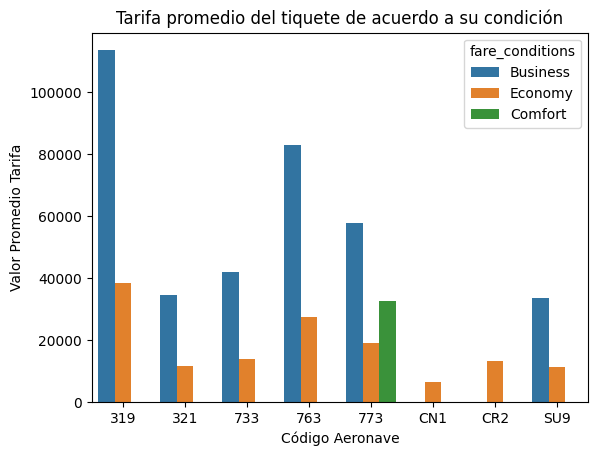

In [43]:
sns.barplot(data=tarifas_aeronave, x='aircraft_code', y='average_amount', hue='fare_conditions')
plt.title('Tarifa promedio del tiquete de acuerdo a su condición')
plt.xlabel('Código Aeronave')

plt.ylabel('Valor Promedio Tarifa')
plt.show()

# En esta gráfica observamos el valor promedio de la tarifa por aeronave de acuerdo a la clase de asiento. 

In [98]:
# Realizamos una consulta sql para hallar la tasa de ocupación por aeronave

tasa_ocupacion_aeronave = pd.read_sql_query("""select a.aircraft_code, a.flight_id, a.booked_seats, b.total_seats, avg(a.booked_seats)/b.total_seats as occupancy_rate  from 
                    (select aircraft_code, flight_id, count(*) as booked_seats from boarding_passes
                    inner join flights using (flight_id) 
                    group by aircraft_code, flight_id) as a
                    inner join 
                    (select aircraft_code, count(*) as total_seats from seats
                    group by aircraft_code) as b 
                    on a.aircraft_code = b.aircraft_code
                    group by a.aircraft_code""", conn)

tasa_ocupacion_aeronave


,aircraft_code,flight_id,booked_seats,total_seats,occupancy_rate
0,319,1162,51,116,0.461924
1,321,1,79,170,0.522407
2,733,1482,98,130,0.617350
3,763,429,140,222,0.513231
4,773,245,222,402,0.659019
5,CN1,672,12,12,0.500369
6,CR2,615,25,50,0.429657
7,SU9,370,43,97,0.585692


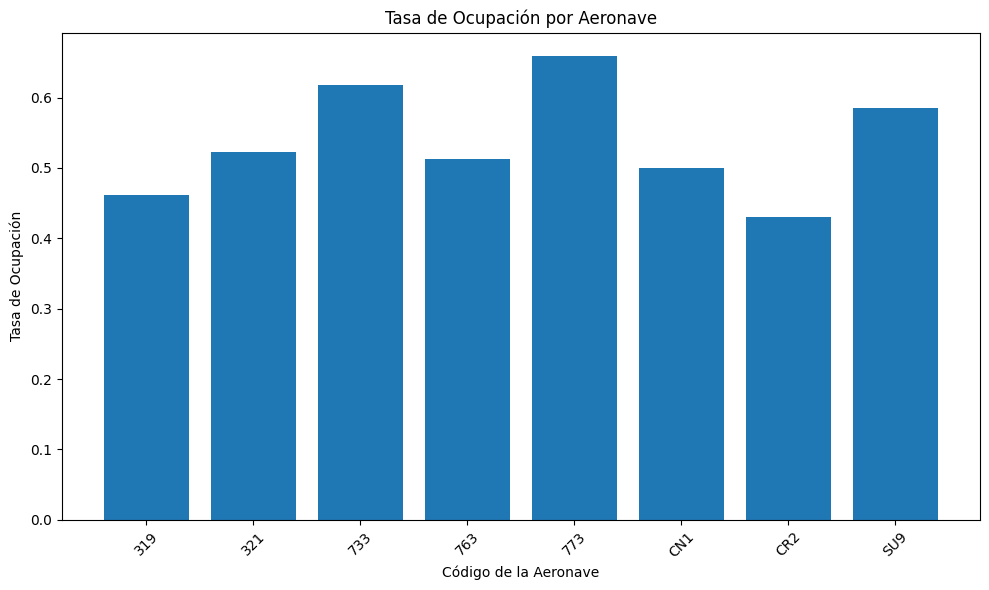

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(occupancy_rate['aircraft_code'], occupancy_rate['occupancy_rate'])


plt.title('Tasa de Ocupación por Aeronave')
plt.xlabel('Código de la Aeronave')
plt.ylabel('Tasa de Ocupación')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

# Con esta gráfica podemos observar que la tasa de ocupación de la mayoría de las aeronaves no supera el 60%

In [68]:
# Convertir las columnas de fechas a formato datetime si no lo están
vuelos['actual_departure'] = pd.to_datetime(vuelos['actual_departure'])
vuelos['actual_arrival'] = pd.to_datetime(vuelos['actual_arrival'])

# Calcular la duración del vuelo en horas
vuelos['duracion_vuelo'] = (vuelos['actual_arrival'] - vuelos['actual_departure']).dt.total_seconds() / 3600

# Agrupar por aircraft_code y sumar las horas de vuelo
horas_vuelo_acumuladas = vuelos.groupby('aircraft_code').agg(
    total_horas_vuelo=('duracion_vuelo', 'sum')
).reset_index()

# Mostrar el resultado
print(horas_vuelo_acumuladas)

  aircraft_code  total_horas_vuelo
0           319        3549.633333
1           321        1206.183333
2           733        1554.000000
3           763        2491.850000
4           773         723.733333
5           CN1       10956.533333
6           CR2        9049.366667
7           SU9        6215.616667


In [118]:
# integramos esta información a nuesta tabla de vuelos y creamos la colunma de cantidad de asientos sin vender y tasa de ocupación
cantidad_asientos_vuelo = pd.merge(cantidad_asientos_vuelo,conteo_pasajeros, on='flight_id', how='left')
cantidad_asientos_vuelo['asientos_sin_vender'] = cantidad_asientos_vuelo['seat_count'] - cantidad_asientos_vuelo['ticket_count']

cantidad_asientos_vuelo

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival,seat_count,ticket_count_x,asientos_sin_vender,tasa_ocupación,ticket_count_y,ticket_count
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT,116,2.0,114.0,0.017241,2.0,2.0
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT,50,28.0,22.0,0.560000,28.0,28.0
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT,222,41.0,181.0,0.184685,41.0,41.0
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT,222,9.0,213.0,0.040541,9.0,9.0
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT,97,15.0,82.0,0.154639,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,50,16.0,34.0,0.320000,16.0,16.0
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,50,16.0,34.0,0.320000,16.0,16.0
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT,50,4.0,46.0,0.080000,4.0,4.0
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,50,13.0,37.0,0.260000,13.0,13.0


In [52]:
# creamos la columna de la tasa de ocupación de los vuelos
cantidad_asientos_vuelo['tasa_ocupación']= cantidad_asientos_vuelo['ticket_count'] / cantidad_asientos_vuelo['seat_count']

cantidad_asientos_vuelo

,aircraft_code,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,modelo_ingles,actual_departure,actual_arrival,seat_count,ticket_count,asientos_sin_vender,tasa_ocupación
0,319,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03:00,DME,BTK,Scheduled,Airbus A319-100,NaT,NaT,116,2.0,114.0,0.017241
1,CR2,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03:00,VKO,HMA,Scheduled,Bombardier CRJ-200,NaT,NaT,50,28.0,22.0,0.560000
2,763,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03:00,VKO,AER,Scheduled,Boeing 767-300,NaT,NaT,222,41.0,181.0,0.184685
3,763,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03:00,SVO,UFA,Scheduled,Boeing 767-300,NaT,NaT,222,9.0,213.0,0.040541
4,SU9,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03:00,SVO,ULV,Scheduled,Sukhoi Superjet-100,NaT,NaT,97,15.0,82.0,0.154639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,CR2,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,50,16.0,34.0,0.320000
33117,CR2,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-07-28 19:30:00+03:00,2017-07-28 20:15:00+03:00,50,16.0,34.0,0.320000
33118,CR2,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03:00,SKX,SVO,Scheduled,Bombardier CRJ-200,NaT,NaT,50,4.0,46.0,0.080000
33119,CR2,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03:00,SKX,SVO,Arrived,Bombardier CRJ-200,2017-08-01 19:26:00+03:00,2017-08-01 20:12:00+03:00,50,13.0,37.0,0.260000


ANÁLISIS AEROPUERTOS

In [47]:
# que aeropuerto tiene mayor flujo de dinero

aeropuertos_cash= pd.read_sql_query("""select ad.airport_code, ad.airport_name, sum(tf.amount) as cash from airports_data ad
                    inner join flights f on ad.airport_code = f.departure_airport
                    inner join ticket_flights tf on tf.flight_id = f.flight_id
                    group by ad.airport_code
                    order by cash desc
                    limit 10""", conn)

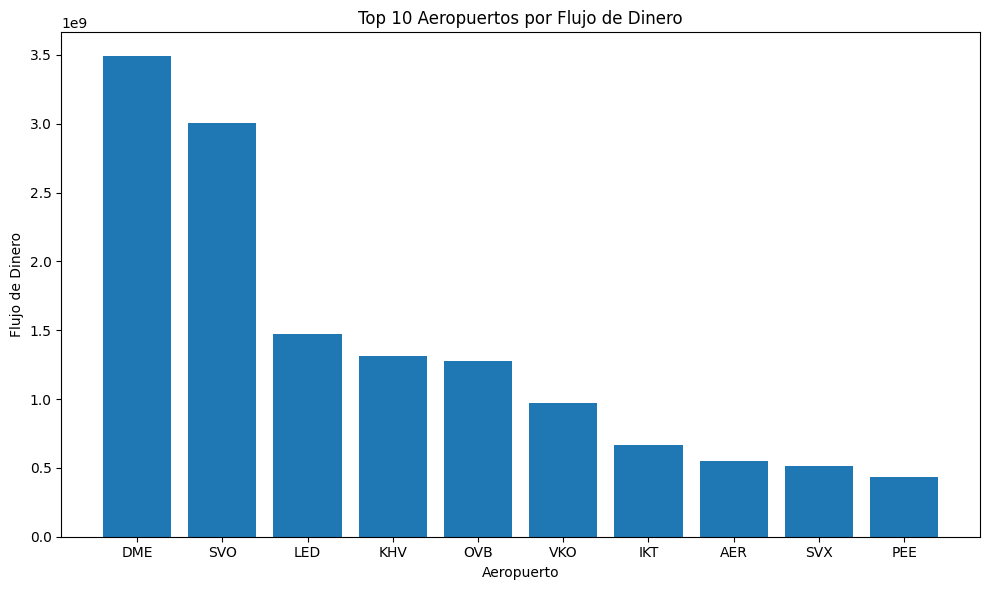

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(aeropuertos_cash['airport_code'], aeropuertos_cash['cash'])
plt.title('Top 10 Aeropuertos por Flujo de Dinero')
plt.xlabel('Aeropuerto')
plt.ylabel('Flujo de Dinero')
plt.tight_layout()
plt.show()

In [60]:
# Top aeropuertos que registran más pasajeros Business Class 
business_class_passengers= pd.read_sql_query(""" SELECT ad.airport_code, COUNT(*) AS count 
FROM airports_data ad 
INNER JOIN flights f ON ad.airport_code = f.departure_airport
INNER JOIN seats s ON s.aircraft_code = f.aircraft_code
WHERE s.fare_conditions = 'Business'
GROUP BY ad.airport_name
ORDER BY count DESC
LIMIT 10""", conn)
business_class_passengers

,airport_code,count
0,DME,37686
1,SVO,34360
2,LED,28470
3,VKO,17110
4,BZK,7320
5,OVB,7184
6,SVX,6936
7,PEE,6890
8,AER,6516
9,ROV,6504


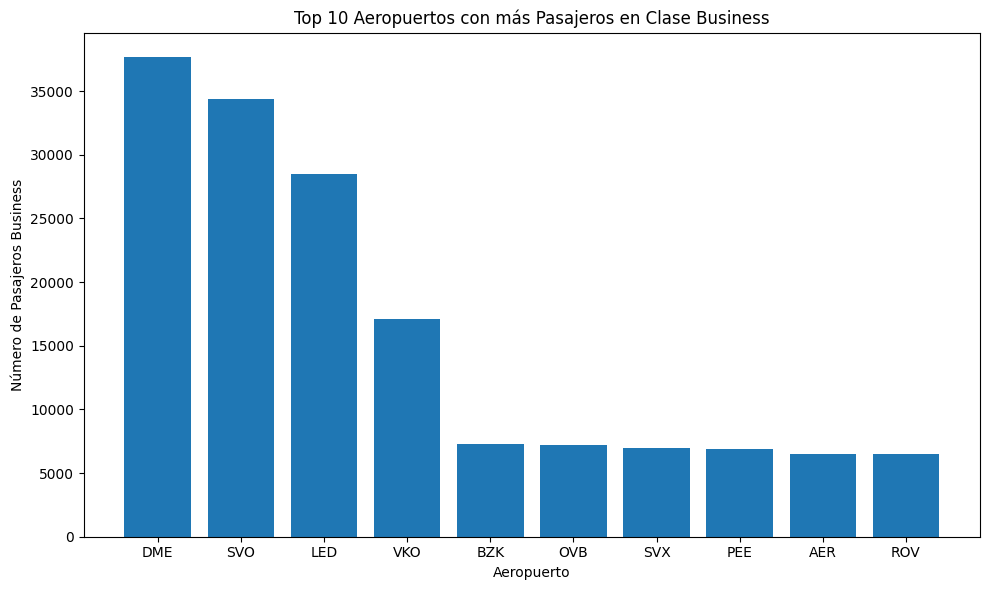

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(business_class_passengers['airport_code'], business_class_passengers['count'])


plt.title('Top 10 Aeropuertos con más Pasajeros en Clase Business')
plt.xlabel('Aeropuerto')
plt.ylabel('Número de Pasajeros Business')
plt.tight_layout()
plt.show()

In [113]:
# Que aeropuerto registra más pasajeros economy
pd.read_sql_query("""select ad.airport_name, count(*) as count from airports_data ad
                    inner join flights f on ad.airport_code = f.departure_airport
                    inner join seats s on s.aircraft_code = f.aircraft_code
                    group by ad.airport_name
                    having s.fare_conditions = 'Economy'
                    order by count desc
                    limit 10""", conn)

,airport_name,count
0,"{""en"": ""Nizhny Novgorod Strigino International...",28330
1,"{""en"": ""Volgograd International Airport"", ""ru""...",25273
2,"{""en"": ""Pobedilovo Airport"", ""ru"": ""Победилово""}",25132
3,"{""en"": ""Roshchino International Airport"", ""ru""...",23778
4,"{""en"": ""Chelyabinsk Balandino Airport"", ""ru"": ...",20029
5,"{""en"": ""Belgorod International Airport"", ""ru"":...",19947
6,"{""en"": ""Khanty Mansiysk Airport"", ""ru"": ""Ханты...",19894
7,"{""en"": ""Novy Urengoy Airport"", ""ru"": ""Новый Ур...",19444
8,"{""en"": ""Cheboksary Airport"", ""ru"": ""Чебоксары""}",18666
9,"{""en"": ""Orenburg Central Airport"", ""ru"": ""Орен...",15799


In [66]:

economy_class_passengers= pd.read_sql_query("""SELECT ad.airport_code, COUNT(*) AS count 
FROM airports_data ad 
INNER JOIN flights f ON ad.airport_code = f.departure_airport
INNER JOIN seats s ON s.aircraft_code = f.aircraft_code
WHERE s.fare_conditions = 'Economy'
GROUP BY ad.airport_name
ORDER BY count DESC
LIMIT 10""", conn)
economy_class_passengers

,airport_code,count
0,DME,285464
1,SVO,284723
2,LED,175082
3,VKO,150481
4,OVB,79478
5,SVX,64360
6,AER,58568
7,PEE,56923
8,BZK,51850
9,ROV,45357


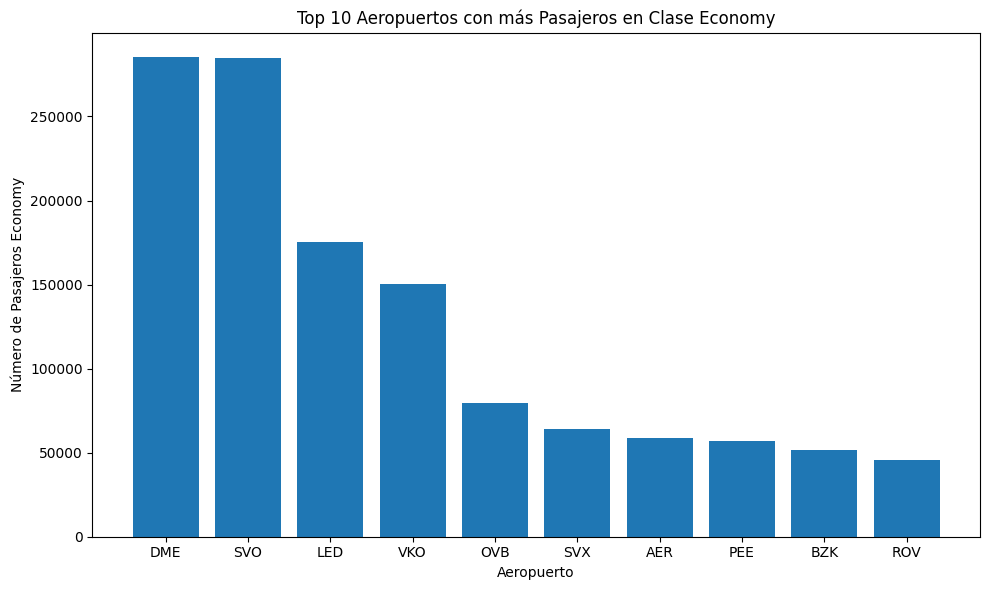

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(economy_class_passengers['airport_code'], economy_class_passengers['count'])
plt.title('Top 10 Aeropuertos con más Pasajeros en Clase Economy')
plt.xlabel('Aeropuerto')
plt.ylabel('Número de Pasajeros Economy')
plt.tight_layout()
plt.show()